
<font size="10">Assignment 1</font>

In [113]:
# import all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [114]:
# load csv
df = pd.read_csv("https://raw.githubusercontent.com/kaka5050/MBAN-6110/main/Asg%201/sales_data.csv")

In [115]:
# show the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [116]:
# show the describtion of the data
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


-There are 50 products selling in 10 Regions

# Drop rows with missing values

In [117]:
# show if there are null value in Sales Date column
df['Sale Date'].isna().sum()

0

As 'Sales Date' column is having the most amount of record and there are no null value in 'Sales Date' column, so there are 1050 rows in the data

In [118]:
# show how many rows are having missing value in each column
null_counts = df.isnull().sum()
print(null_counts)

Product       103
Region        104
Price         105
Units Sold    104
Sale Date       0
dtype: int64


There are + 100 of null values in the 4 columns excluding 'Sales Date', so I will try to clean up all the rows with null value and see how many rows are remaining.

In [119]:
# 1st data cleaning: try to clean all the rows with null value and see how many rows are left in the cleaned data
df_clean_noNull = df.dropna()
rows_left = df_clean_noNull.count()
print(rows_left)

Product       687
Region        687
Price         687
Units Sold    687
Sale Date     687
dtype: int64


In [120]:
# calculate the percentage of rows being cleaned up 
1 - 687/1050

0.34571428571428575

<p>If I clean up all the rows with null value, I am cleaning up close to 35% of rows. I think this is too much.</p> 
<P>I will try to remove the rows with null value in column 'Products' and 'Region' instead of all the rows with null value. See how many percent of data are left.</p>

In [130]:
# remove all the rows with null value in column 'Product'
df_clean_Product = df.dropna(subset=['Product'])
df_clean_Product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 2 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      853 non-null    object 
 2   Price       854 non-null    float64
 3   Units Sold  852 non-null    float64
 4   Sale Date   947 non-null    object 
dtypes: float64(2), object(3)
memory usage: 44.4+ KB


In [122]:
947/1050

0.9019047619047619

In [123]:
# remove all the rows with null value in column 'Region'
df_clean_Region = df.dropna(subset=['Region'])
df_clean_Region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     853 non-null    object 
 1   Region      946 non-null    object 
 2   Price       846 non-null    float64
 3   Units Sold  856 non-null    float64
 4   Sale Date   946 non-null    object 
dtypes: float64(2), object(3)
memory usage: 44.3+ KB


In [124]:
946/1050

0.900952380952381

In [125]:
# remove all the rows with null value in column 'Product' and 'Region'
df_clean_ProductRegion = df.dropna(subset=['Product','Region'])
df_clean_ProductRegion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 2 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     853 non-null    object 
 1   Region      853 non-null    object 
 2   Price       764 non-null    float64
 3   Units Sold  771 non-null    float64
 4   Sale Date   853 non-null    object 
dtypes: float64(2), object(3)
memory usage: 40.0+ KB


In [126]:
853/1050

0.8123809523809524

<p>df_clean_Product - 90% of rows remaining</p>
<p>df_clean_Region - 90% of rows remaining</p>
<p>df_clean_ProductRegion - 80% of rows remaining</p>
<p>Less rows are being removed using the above data cleaning approch. Therefore, I will analyze the data as mentioned below</p> 
<p>df_clean_Product: Analyzing the performance of Products</p>
<p>df_clean_Region: Analyzing the performance of Regions</p>
<p>df_clean_ProductRegion: Analyzing the performance of Products and Regions</p>

In [127]:
df_clean_Product.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,853,854.000000,852.000000,947
unique,50,10,NaN,NaN,900
top,Product_45,Region_9,NaN,NaN,2023-04-15
freq,28,101,NaN,NaN,2
mean,NaN,NaN,107.982037,10.090376,NaN
std,NaN,NaN,126.917044,3.192611,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.462500,8.000000,NaN
50%,NaN,NaN,77.520000,10.000000,NaN
75%,NaN,NaN,142.512500,12.000000,NaN


<Axes: >

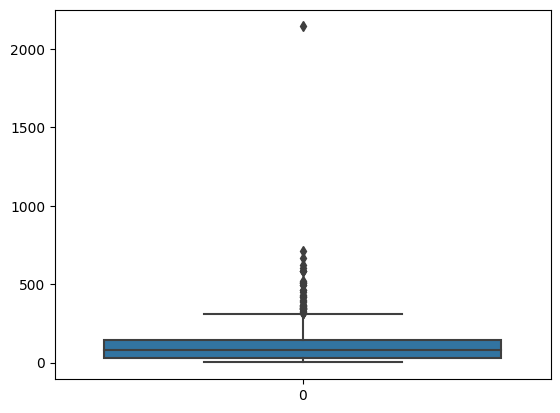

In [128]:
df_clean_Product.reset_index(drop=True, inplace=True)
sns.boxplot(df_clean_Product['Price'])

In [111]:
df_clean_Product[df_clean_Product['Price'] > 500].count()

Product       12
Region        11
Price         12
Units Sold    10
Sale Date     12
dtype: int64

<Axes: >

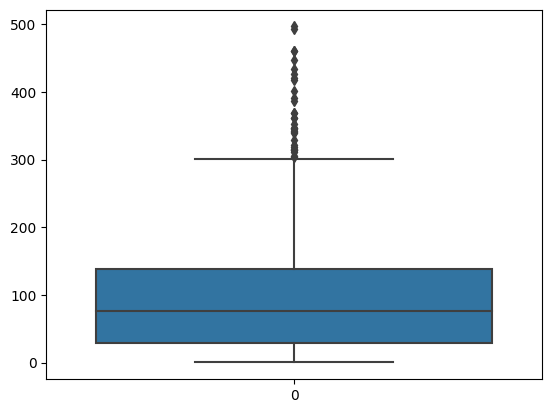

In [131]:
df_clean_Product = df_clean_Product[df_clean_Product['Price'] <= 500]
df_clean_Product.reset_index(drop=True, inplace=True)
sns.boxplot(df_clean_Product['Price'])

<Axes: >

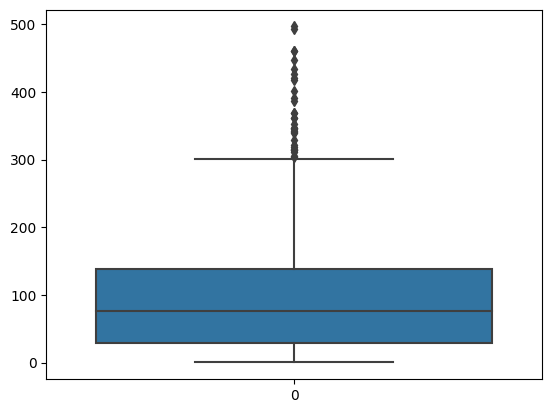

In [133]:
mean_price_product = df_clean_Product['Price'].mean()
df_clean_Product['Price'].fillna(mean_price_product, inplace=True)
sns.boxplot(df_clean_Product['Price'])

In [136]:
df_clean_Product.isnull().sum()

Product        0
Region        89
Price          0
Units Sold    86
Sale Date      0
dtype: int64

# Fill Null value for Price and Unit sold for the 3 dataframes

C:\Users\Oscar_On\AppData\Local\Temp\ipykernel_18208\1731363818.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Product', y='Units Sold', data = df_clean_Product, ci = "sd")


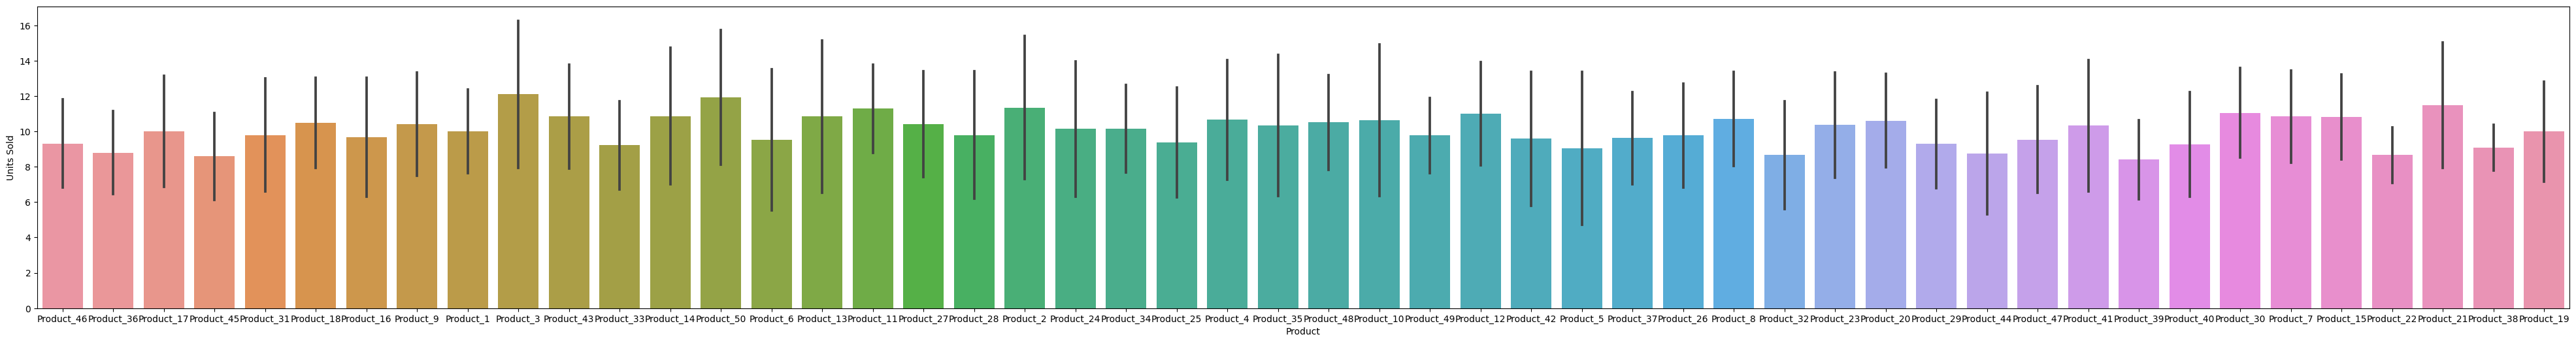

In [137]:
plt.figure(figsize=(50, 6))
sns.barplot(x='Product', y='Units Sold', data = df_clean_Product, ci = "sd")
plt.show()

In [90]:
df_clean_Product.type()


AttributeError: 'DataFrame' object has no attribute 'type'